In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# Load the data
housing = fetch_california_housing()

#  Features and Target
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

# Concatenate features and target into one DataFrame
df = pd.concat([X, y], axis=1)

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Mean Absolute Error (MAE): 0.48666895435420465
Mean Squared Error (MSE): 0.4457214385222757
Root Mean Squared Error (RMSE): 0.6676237252541851
R² Score: 0.6320323098330118
Cross-Validation Mean Squared Error: 0.4693996509776717


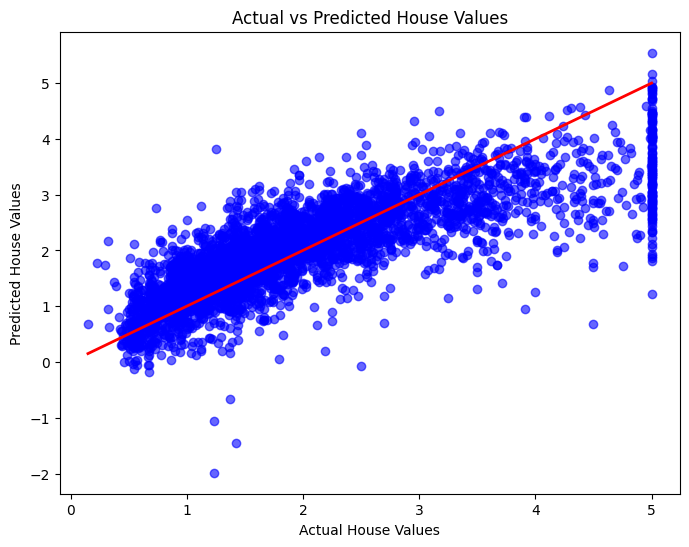

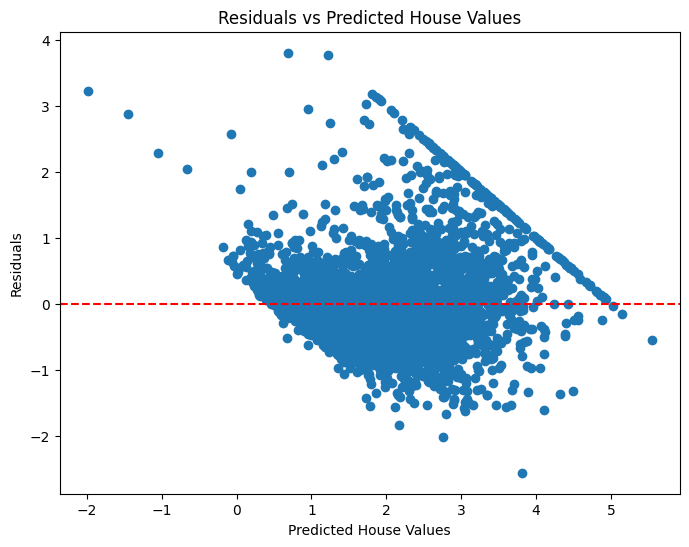

Ridge Regression - MAE: 0.48666529152252097, MSE: 0.44574013959503034, RMSE: 0.6676377308054349, R²: 0.6320168710635239
Lasso Regression - MAE: 0.5911904530246094, MSE: 0.6175769274363334, RMSE: 0.7858606285063106, R²: 0.4901561023347183

Comparison of Regression Models:
Linear Regression - R²: 0.6320323098330118
Ridge Regression - R²: 0.6320168710635239
Lasso Regression - R²: 0.4901561023347183


In [12]:

# Outlier Removal (Fixing the function to handle all columns properly)
def outlier_remove(df, columns):
    for i in columns:
        z_score = np.absolute(stats.zscore(df[i]))
        df = df[z_score < 3]  # Removing outliers with Z-score > 3
    return df

# Remove outliers
df = outlier_remove(df, df.columns)

# Separate features (X) and target (y)
X = df.drop("MedHouseVal", axis=1)
y = df['MedHouseVal']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

#  Predictions
y_pred = lr.predict(X_test)

#  Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Print out the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Cross-validation for linear regression
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Mean Squared Error: {-cv_scores.mean()}")

# Visualization: Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line of perfect prediction
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Actual vs Predicted House Values')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted House Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted House Values')
plt.show()

# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=2)  # Regularization strength (alpha)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"Ridge Regression - MAE: {mae_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}, R²: {r2_ridge}")

# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)  # Regularization strength (alpha)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print(f"Lasso Regression - MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}, R²: {r2_lasso}")

#Compare Models' Performance
print("\nComparison of Regression Models:")
print(f"Linear Regression - R²: {r2}")
print(f"Ridge Regression - R²: {r2_ridge}")
print(f"Lasso Regression - R²: {r2_lasso}")
